<a href="https://colab.research.google.com/github/ngcheeyuan/Tensorflow-Certification-Practice/blob/main/Binary_Alpha_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import random

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ds, ds_info = tfds.load('binary_alpha_digits',
                        with_info = True,
                        shuffle_files = True,
                        as_supervised = True
                        )

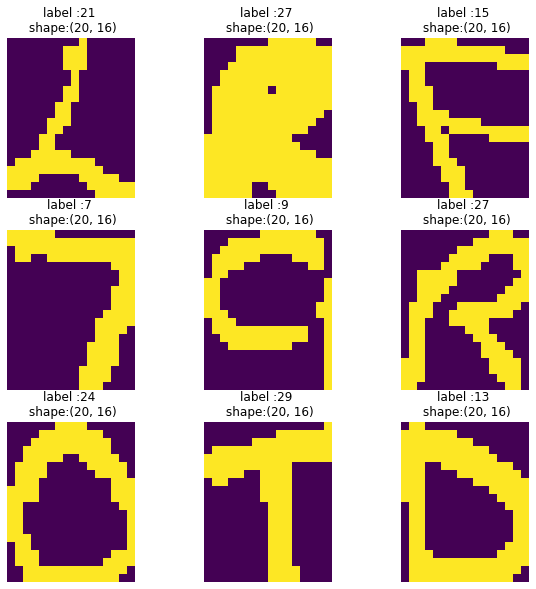

In [ ]:
random_index = random.randint(0,len(ds['train'])-9)
example = ds['train'].skip(random_index).take(9)
plt.figure(figsize = (10,10))
for index,(image,label) in enumerate(example,1):
  plt.subplot(3,3,index)
  plt.imshow(image.numpy().squeeze())
  plt.axis(False)
  plt.title(f'label :{label} \n shape:{image.numpy().squeeze().shape}')

In [ ]:
TEST_SIZE = 0.25
ds_train = ds['train'].take(int((1-TEST_SIZE)*len(ds['train'])))
ds_val = ds['train'].skip(int((1-TEST_SIZE)*len(ds['train'])))

In [ ]:
image_list = []
label_list = []
for image , label in ds['train'].take(len(ds_train)):
  image_list.append(tf.cast(image,dtype = tf.float32))
  label_list.append(label.numpy())

In [ ]:
image_list[0].shape

TensorShape([20, 16, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train , y_val = train_test_split(image_list,
                                                    label_list,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    stratify = label_list)

In [ ]:
 from collections import Counter
 Counter(label_list)

Counter({0: 30,
         1: 29,
         2: 31,
         3: 32,
         4: 28,
         5: 28,
         6: 24,
         7: 34,
         8: 33,
         9: 29,
         10: 29,
         11: 32,
         12: 29,
         13: 28,
         14: 27,
         15: 25,
         16: 30,
         17: 30,
         18: 33,
         19: 29,
         20: 33,
         21: 28,
         22: 30,
         23: 26,
         24: 30,
         25: 27,
         26: 30,
         27: 24,
         28: 34,
         29: 31,
         30: 31,
         31: 23,
         32: 28,
         33: 34,
         34: 29,
         35: 25})

In [ ]:
def dataset_prep(images,labels):
  image_data = tf.data.Dataset.from_tensor_slices(images)
  label_data = tf.data.Dataset.from_tensor_slices(labels)
  dataset = tf.data.Dataset.zip((image_data,label_data))
  dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

  return dataset

In [ ]:
ds_train = dataset_prep(X_train,y_train)
ds_val = dataset_prep(X_val,y_val)

In [ ]:
print(ds_train)
print(ds_val)

<PrefetchDataset shapes: ((None, 20, 16, 1), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 20, 16, 1), (None,)), types: (tf.float32, tf.int32)>


## Model 0: VGG Block

In [ ]:
FILTERS = 10
KERNEL_SIZE = (2,2)
model = tf.keras.Sequential([
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', name = 'conv_1_1'),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', name = 'conv_1_2'),
                             layers.AveragePooling2D(name = 'pool_1'),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', name = 'conv_2_1'),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', name = 'conv_2_2'),
                             layers.AveragePooling2D(name = 'pool_2'),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', name = 'conv_3_1'),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', name = 'conv_3_2'),
                             layers.AveragePooling2D(name = 'pool_3'),                            
                             layers.Flatten(),
                             layers.Dense(36,activation = 'softmax')
])

In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.RMSprop())

In [ ]:
FILEPATH = 'model_checkpoints/'
history_0 = model.fit(ds_train,
                      epochs = 100,
                      validation_data = ds_val,
                      callbacks = [callbacks.EarlyStopping(monitor = 'val_loss',
                                                          patience = 10,
                                                          min_delta = 0.0001,
                                                          ),
                                  callbacks.ModelCheckpoint(filepath = FILEPATH,
                                                            save_best_only = True)]
                      )

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 3.5799 - accuracy: 0.0292INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 71ms/step - loss: 3.5799 - accuracy: 0.0292 - val_loss: 3.5698 - val_accuracy: 0.0379
Epoch 2/100
24/25 [===========================>..] - ETA: 0s - loss: 3.5606 - accuracy: 0.0378INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 66ms/step - loss: 3.5609 - accuracy: 0.0380 - val_loss: 3.5374 - val_accuracy: 0.0455
Epoch 3/100
23/25 [==========================>...] - ETA: 0s - loss: 3.5134 - accuracy: 0.0503INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 65ms/step - loss: 3.5122 - accuracy: 0.0494 - val_loss: 3.4622 - val_accuracy: 0.0530
Epoch 4/100
22/25 [=========================>....] - ETA: 0s - loss: 3.4163 - accuracy: 0.0526INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 69ms/step - loss: 3.4129 - accuracy: 0.0545 - val_loss: 3.3264 - val_accuracy: 0.0795
Epoch 5/100
21/25 [========================>.....] - ETA: 0s - loss: 3.2617 - accuracy: 0.0893INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 65ms/step - loss: 3.2471 - accuracy: 0.0938 - val_loss: 3.1236 - val_accuracy: 0.1667
Epoch 6/100
21/25 [========================>.....] - ETA: 0s - loss: 3.0438 - accuracy: 0.1503INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 65ms/step - loss: 3.0263 - accuracy: 0.1559 - val_loss: 2.9008 - val_accuracy: 0.2083
Epoch 7/100
25/25 [==============================] - ETA: 0s - loss: 2.8116 - accuracy: 0.2193INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 63ms/step - loss: 2.8116 - accuracy: 0.2193 - val_loss: 2.7304 - val_accuracy: 0.2197
Epoch 8/100
25/25 [==============================] - ETA: 0s - loss: 2.6478 - accuracy: 0.2497INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 65ms/step - loss: 2.6478 - accuracy: 0.2497 - val_loss: 2.6113 - val_accuracy: 0.2500
Epoch 9/100
24/25 [===========================>..] - ETA: 0s - loss: 2.5304 - accuracy: 0.2773INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 65ms/step - loss: 2.5225 - accuracy: 0.2801 - val_loss: 2.5178 - val_accuracy: 0.2727
Epoch 10/100
24/25 [===========================>..] - ETA: 0s - loss: 2.4272 - accuracy: 0.3008

In [ ]:
model_1 = tf.keras.Sequential([layers.Flatten(),
                               layers.Dense(36,activation = 'softmax')
])

In [ ]:
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.RMSprop(),
                metrics = ['accuracy'])

In [ ]:
FILEPATH = 'model_checkpoints/'
history_1 = model_1.fit(ds_train,
                        epochs = 100,
                        validation_data = ds_val,
                        callbacks = [callbacks.EarlyStopping(monitor = 'val_loss',
                                                            patience = 10,
                                                            min_delta = 0.0001,
                                                            ),
                                    callbacks.ModelCheckpoint(filepath = FILEPATH,
                                                              save_best_only = True)]
                        )